# Plotting the modulated atmospheric neutrino angular distributions
Data taken from the most recent atmospheric model calculation http://www.icrr.u-tokyo.ac.jp/~mhonda/

This notebook is for checking the modulation analysis reported there to see if it might be important for us.

## Conclusion is no, see below:

In [2]:
import sys
sys.path.append('../src')
from numpy import *
from numpy import random
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from Params import *
from NeutrinoFuncs import *
from LabFuncs import *
from PlotFuncs import *
import cmocean
%matplotlib inline

0305 : Norm =  0.22968044744968016


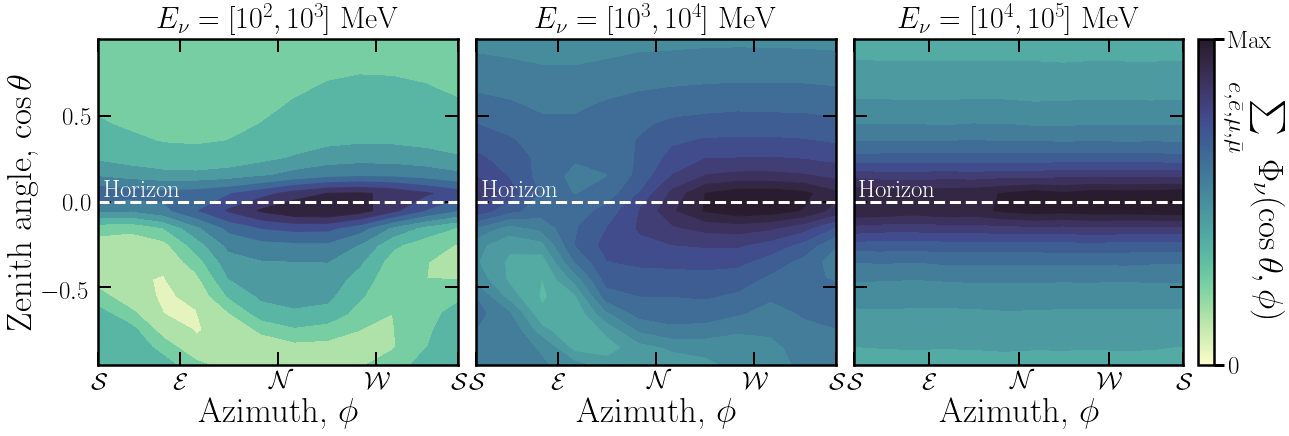

0608 : Norm =  0.22955338016578197


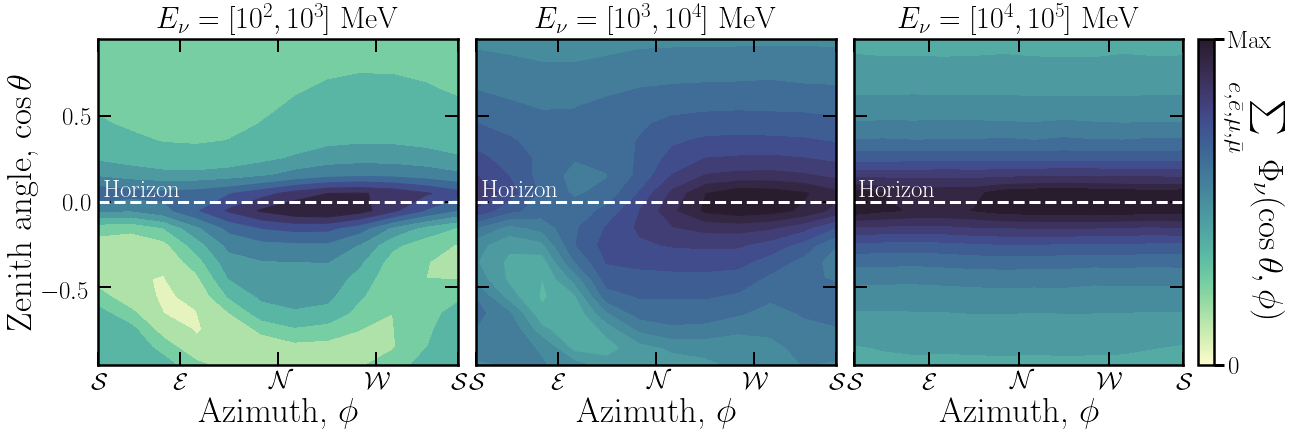

0911 : Norm =  0.2295365186221125


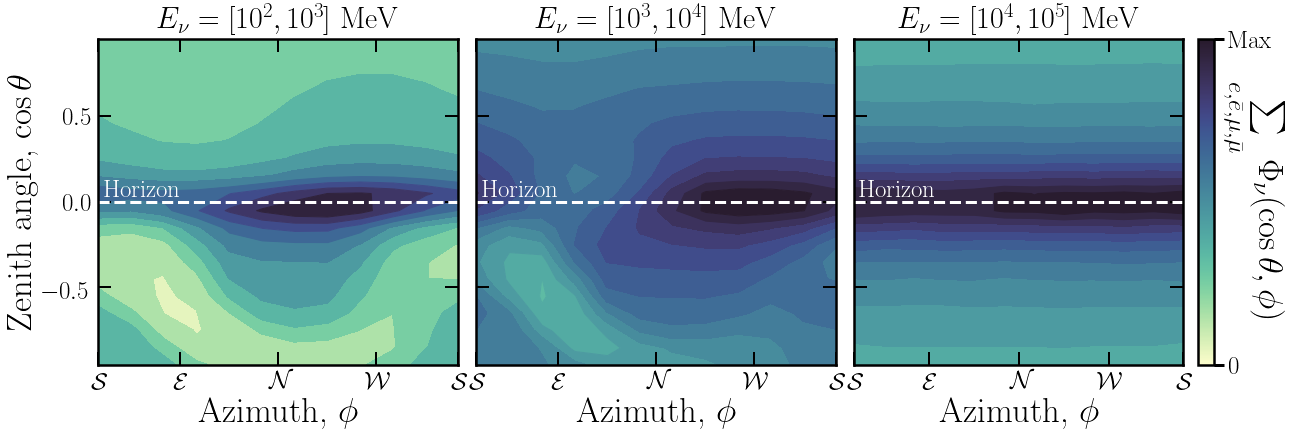

1202 : Norm =  0.22958963602665322


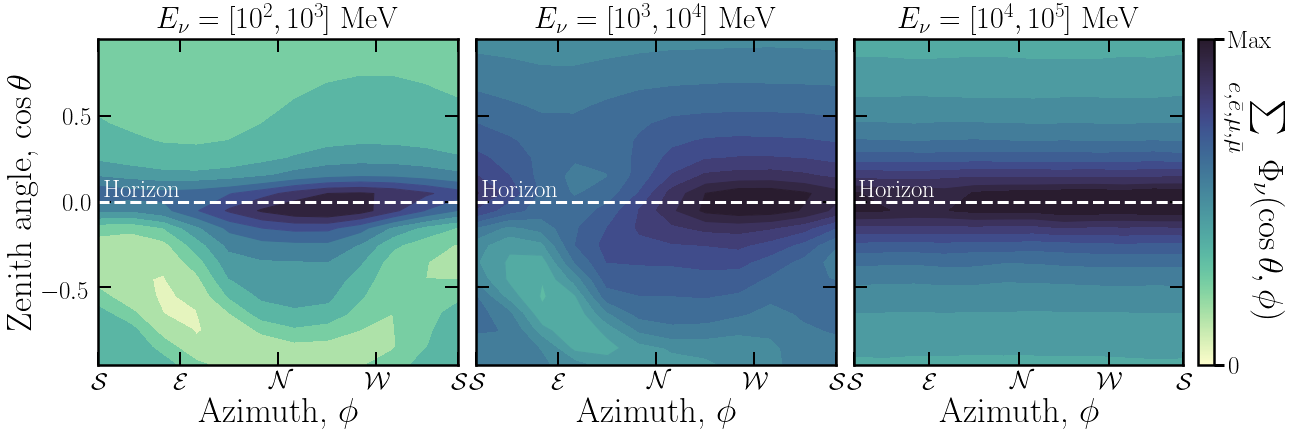

In [10]:
def MakeAtmNuPlot_costhphi(Phi_tot,E_high,cosZ,phi_Az):
    Phi_tot1 = sum(Phi_tot[:,:,0:20],2)
    Phi_tot2 = sum(Phi_tot[:,:,20:40],2)
    Phi_tot3 = sum(Phi_tot[:,:,40:60],2)

    maxPhi = amax(Phi_tot1)
    minPhi = amax(Phi_tot3)

    cmap = cmocean.cm.deep
    
    
    fig,ax1,ax2,ax3 = MyTriplePlot(size_y=6,wspace=0.05,lfs=35)

    cnt1 = ax1.contourf(phi_Az,cosZ,Phi_tot1.T/amax(Phi_tot1.T),levels=10,cmap=cmap,vmin=0,vmax=1)
    cnt2 = ax2.contourf(phi_Az,cosZ,Phi_tot2.T/amax(Phi_tot2.T),levels=10,cmap=cmap,vmin=0,vmax=1)
    im = ax3.pcolormesh(phi_Az,cosZ,Phi_tot3.T/amax(Phi_tot3.T),cmap=cmap,vmin=0,vmax=1)
    cnt3 = ax3.contourf(phi_Az,cosZ,Phi_tot3.T/amax(Phi_tot3.T),levels=10,cmap=cmap,vmin=0,vmax=1)

    # This is the fix for the white lines between contour levels
    for c in cnt1.collections:
        c.set_edgecolor("face")
    for c in cnt2.collections:
        c.set_edgecolor("face")
    for c in cnt3.collections:
        c.set_edgecolor("face")

    ax1.set_title(r'$E_\nu = [10^2,10^3]$ MeV',fontsize=30)
    ax2.set_title(r'$E_\nu = [10^3,10^4]$ MeV',fontsize=30)
    ax3.set_title(r'$E_\nu = [10^4,10^5]$ MeV',fontsize=30)

    ax2.set_yticklabels([])
    ax3.set_yticklabels([])


    phi_ticks = [15,90,180,270,360-15]
    phi_ticklabels = [r'$\mathcal{S}$',r'$\mathcal{E}$',r'$\mathcal{N}$',r'$\mathcal{W}$',r'$\mathcal{S}$']
    ax1.set_ylabel(r'Zenith angle, $\cos{\theta}$')
    ax1.set_xlabel(r'Azimuth, $\phi$')
    ax2.set_xlabel(r'Azimuth, $\phi$')
    ax3.set_xlabel(r'Azimuth, $\phi$')

    ax1.set_xticks(phi_ticks)
    ax1.set_xticklabels(phi_ticklabels)
    ax1.plot([15,360-15],[0,0],'w--',lw=3)
    ax1.text(20,0.03,'Horizon',fontsize=25,color='w')

    ax2.set_xticks(phi_ticks)
    ax2.set_xticklabels(phi_ticklabels)
    ax2.plot([15,360-15],[0,0],'w--',lw=3)
    ax2.text(20,0.03,'Horizon',fontsize=25,color='w')

    ax3.set_xticks(phi_ticks)
    ax3.set_xticklabels(phi_ticklabels)
    ax3.plot([15,360-15],[0,0],'w--',lw=3)
    ax3.text(20,0.03,'Horizon',fontsize=25,color='w')

    cb = cbar(im)
    cb.set_ticks([0,1])
    cb.set_ticklabels([0,'Max'])
    cb.ax.set_ylabel(r'$\sum\limits_{e,\bar{e},\mu,\bar{\mu}} \Phi_\nu(\cos{\theta},\phi)$',rotation=-90,labelpad=10,fontsize=35)
    plt.show()



filedates = ['0305','0608','0911','1202']
for fname in filedates:
    Phi_tot,E_high,cosZ,phi_Az = GetAtmNuFluxes('modulated/AtmNu_GranSasso_SolarMax_'\
                                                +fname+'.d')
    print(fname,': Norm = ',sum(Phi_tot))
    MakeAtmNuPlot_costhphi(Phi_tot,E_high,cosZ,phi_Az)
    
    
    